### Carregando Dataset

In [1]:
import pandas as pd

work_directory = "../../combustiveis/"
dataset_name = "dataset_etanol_sp.csv"

df = pd.read_csv(work_directory + dataset_name, sep=",", decimal=".", encoding="cp860", index_col=False)

In [2]:
df = df.dropna()

In [3]:
df.head()

,Semestre,ΓêÒΓòùΓõÉRegiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
6,2020-01,SE,SP,AMPARO,AUTO POSTO DBV LTDA,09.371.227/0001-18,AVENIDA ANESIO GUIDI,344,ESQ.R.RACHID KASSOUF,DISTRITO TRES PONTES,13909-000,ETANOL,02/01/2020,3.099,2.6887,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
14,2020-01,SE,SP,ATIBAIA,POSTO 22 - ATIBAIA LTDA,05.343.449/0001-76,RODOVIA FERNAO DIAS,S/N,"KM. 47,5",PORTAO,12949-030,ETANOL,03/01/2020,2.997,2.7501,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
15,2020-01,SE,SP,ATIBAIA,POSTO DE COMBUSTIVEL ATIBAIA SP LTDA,69.345.254/0001-48,RODOVIA FERNAO DIAS,S/N,KM 50,PORTΓõ£├óO,12940-000,ETANOL,03/01/2020,3.097,2.7555,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
30,2020-01,SE,SP,CACAPAVA,CARREFOUR COMERCIO E INDUSTRIA LTDA,45.543.915/0355-62,AVENIDA BRASIL,401,SETOR I,CENTRO,12287-020,ETANOL,03/01/2020,3.079,2.6946,R$ / litro,RAIZEN
62,2020-01,SE,SP,GUARULHOS,FAROL COMERCIAL LTDA,49.091.291/0001-60,RODOVIA PRESIDENTE DUTRA,S/N,KM 208+620 MTS,BONSUCESSO,07178-580,ETANOL,03/01/2020,2.949,2.6726,R$ / litro,RAIZEN


In [4]:
df = df[["Valor de Venda", "Valor de Compra"]]

In [5]:
df

,Valor de Venda,Valor de Compra
6,3.099,2.6887
14,2.997,2.7501
15,3.097,2.7555
30,3.079,2.6946
62,2.949,2.6726
...,...,...
2031909,1.979,1.7599
2031918,2.199,1.9351
2031950,2.299,2.0434
2031981,2.199,1.9000


### Visualizando Correlações

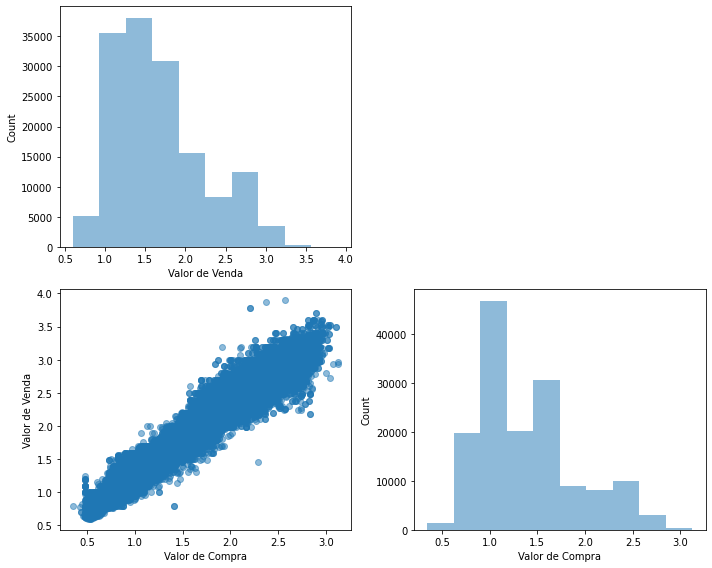

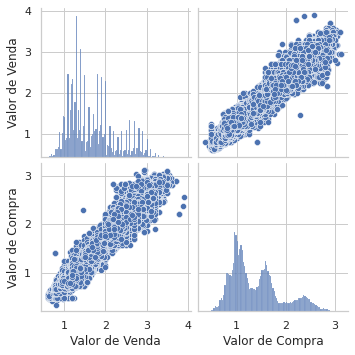

<AxesSubplot:>

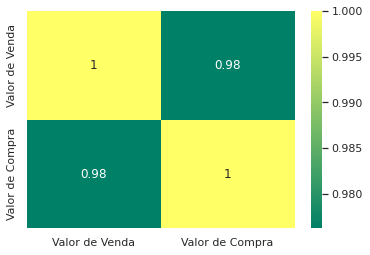

In [6]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
import seaborn as sns

# Scatter
scatterplotmatrix(df.values, figsize=(10, 8), names=df.columns, alpha=0.5)
plt.tight_layout()
plt.show()

# Pair Plot
sns.set(style='whitegrid', context='notebook')
cols = df.columns
sns.pairplot(df, height=2.5)
plt.show()

# Heat Map

sns.heatmap(df.corr(),annot=True,cmap='summer')

### Realizando Regressão Linear

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Definindo valores que serão utilizados
X = df[["Valor de Compra"]].values
y = df["Valor de Venda"].values

# Separando dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Treinando o modelo
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

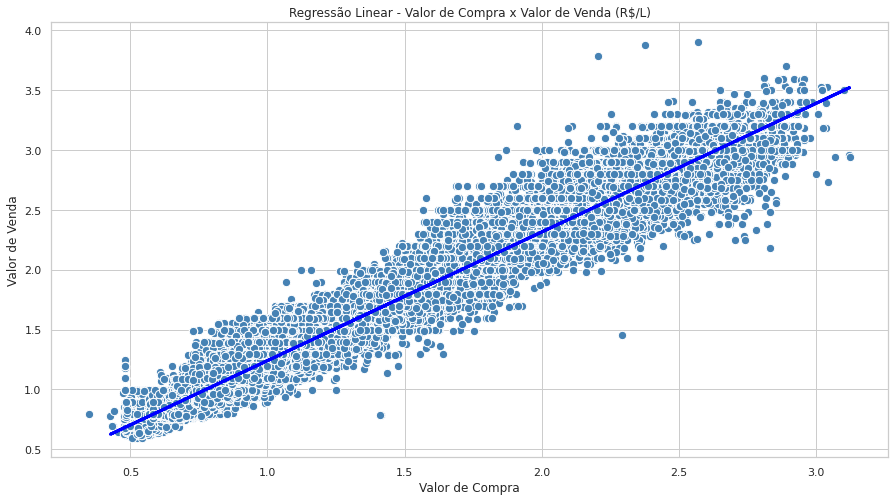

In [8]:
y_pred = reg.predict(X_test)

plt.figure(figsize = (15,8))
plt.scatter(df['Valor de Compra'], df['Valor de Venda'], c='steelblue', edgecolor='white', s=70)

plt.plot(X_test, y_pred, c='blue',linewidth=3, linestyle='solid')

plt.title("Regressão Linear - Valor de Compra x Valor de Venda (R$/L)")
plt.xlabel("Valor de Compra")
plt.ylabel("Valor de Venda")
plt.show()



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test, y_pred))

In [ ]:
# Visualizando matriz de confusão
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Atual'], colnames=['Predito'])

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_matrix, annot=True, ax=ax)

### Regressão Linear Conforme Modelo do Professor

In [ ]:
X = df[["Valor de Compra"]].values
Y = df["Valor de Venda"].values

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

sc_x = StandardScaler()
sc_y = StandardScaler()
x_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(Y[:,np.newaxis]).flatten()

In [ ]:
lr = LinearRegression()
lr.fit(x_std, y_std)

In [ ]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return

In [ ]:
lin_regplot(x_std, y_std, lr)
plt.xlabel('Valor de Compra')
plt.ylabel('Valor de Venda')
plt.show()